# 6. Activation Functions

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim #backpropagation
import torch.nn.functional as F #sigmoid, relu
import numpy as np

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

## 6.1 Generate Data

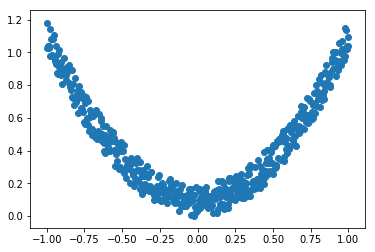

In [12]:
x = torch.linspace(-1, 1, 500) #-1~1 사이 500개 data
y = x.pow(2) + 0.2*torch.rand(x.size())

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [13]:
x.shape, y.shape

(torch.Size([500]), torch.Size([500]))

In [14]:
x = torch.unsqueeze(x, dim=1) #보통 reshape, view 씀
y = torch.unsqueeze(y, dim=1)

In [15]:
x.shape, y.shape

(torch.Size([500, 1]), torch.Size([500, 1]))

## 6.2 Define & Train Linear Model

In [16]:
hidden = nn.Linear(1, 20, bias=True) #weight 40개
output = nn.Linear(20, 1, bias=True) #weight 21개
#1->20->1 구조

In [17]:
model = nn.Sequential(hidden, output) #x가 차례대로 통과 (은닉, 출력)

In [18]:
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1) #batch를 쓰기 때문에 stochastic (안쓰면 GD)

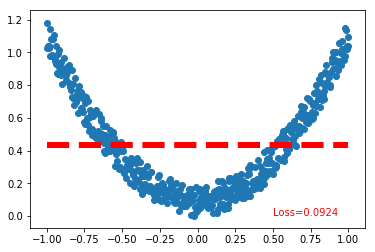

In [19]:
for step in range(500):
    pre = model(x)
    cost = loss(pre, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), pre.data.numpy(), 'r--', lw=6)
plt.text(0.5, 0, 'Loss=%.4f' % cost.item(), fontdict={'size':10, 'color':'red'})
plt.show()

#### LINEAR로만 학습했기 때문에 LINEAR로 근사됨.

## 6.3 Define & Train NonLinear Model

In [20]:
hidden = nn.Linear(1, 20, bias=True)
activation = nn.ReLU()
output = nn.Linear(20, 1, bias=True)

In [21]:
model = nn.Sequential(hidden, activation, output)

In [22]:
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

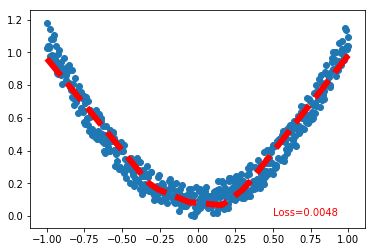

In [23]:
for step in range(500):
    pre = model(x)
    cost = loss(pre, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), pre.data.numpy(), 'r--', lw=6)
plt.text(0.5, 0, 'Loss=%.4f' % cost.item(), fontdict={'size':10, 'color':'red'})
plt.show()

### XOR 구현

In [24]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = torch.FloatTensor([[0], [1], [1], [0]])

In [27]:
# nn layers
linear1 = torch.nn.Linear(2, 10, bias=True)
linear2 = torch.nn.Linear(10, 10, bias=True)
linear3 = torch.nn.Linear(10, 10, bias=True)
linear4 = torch.nn.Linear(10, 1, bias=True)
sigmoid = torch.nn.Sigmoid()
# model
model = torch.nn.Sequential(linear1, sigmoid, linear2, sigmoid, linear3, sigmoid, linear4, sigmoid)
# define cost/loss & optimizer
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1)

#### BCELoss함수를 쓸땐 마지막 레이어를 시그모이드함수를 적용시켜줘야 함.

In [28]:
for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    # cost/loss function
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0:
        print(step, cost.item())

0 0.708275556564331
100 0.6931362152099609
200 0.6931350231170654
300 0.6931338310241699
400 0.6931325197219849
500 0.6931310892105103
600 0.6931297779083252
700 0.693128228187561
800 0.6931266784667969
900 0.6931250691413879
1000 0.6931232213973999
1100 0.6931213140487671
1200 0.6931192874908447
1300 0.6931171417236328
1400 0.6931148767471313
1500 0.6931123733520508
1600 0.6931097507476807
1700 0.6931068301200867
1800 0.6931036710739136
1900 0.6931002140045166
2000 0.693096399307251
2100 0.6930921077728271
2200 0.6930875778198242
2300 0.693082332611084
2400 0.6930766105651855
2500 0.6930701732635498
2600 0.6930629014968872
2700 0.6930546760559082
2800 0.6930452585220337
2900 0.693034291267395
3000 0.6930216550827026
3100 0.6930068731307983
3200 0.6929892897605896
3300 0.6929683089256287
3400 0.6929426789283752
3500 0.6929112076759338
3600 0.6928714513778687
3700 0.69282066822052
3800 0.6927535533905029
3900 0.6926622986793518
4000 0.6925331354141235
4100 0.6923406720161438
4200 0.6920